# COGS 118B - Final Project

# Applying and Analyzing Gaussian Mixture Model to Music Data

## Group members

- Valeria Gonzalez Perez A16366104
- Gemma Luengo-Woods A17622576
- Aarohi Zade A16222196
- Nick Campos A17621673

# Abstract 
Conventional recommendation systems, despite employing ML algorithms, often fall short in providing tailored suggestions that transcend traditional genre boundaries. By examining tens of thousands of songs over 13 features, we aimed to build an unsupervised machine learning model that would capture these nuances. First, we randomly selected 40,000 tracks to perform UMAP and, after running several trials, decided to move forward with a value of 30 neighbors. We then ran several Gaussian Mixture Models (ranging from 3 components to 13) and calculated the silhouette score for each trial. As a second evaluation metric, we examined the Bayesian Information Criterion to find the elbow point that would demarcate the optimal number of clusters. After plotting the silhouette scores, the optimal number of clusters appears to be 5 and after plotting BIC scores, the optimal number of clusters appears to be 6. In future development of this project, we aim to apply a supervised machine learning algorithm that would assign cluster labels to each song in our dataset and with a secondary database on users’ music preferences, we would recommend songs that belong within the same cluster of a user’s song choices or that are most similar to one of the 5/6 clusters obtained in order to create a curated recommendation system.



# Background

The recommendation system of a music platform can be the difference between a mediocre one and a great one. Apple Music, for instance, has almost become infamous for having a subpar recommendation system <a name="applemusic"></a>[<sup>[1]</sup>](#applemusicnote). Inspired by Spotify’s “Discover Weekly” <a name="discoverweekly"></a>[<sup>[2]</sup>](#discoverweeklynote), our goal is to use unsupervised machine learning to serve as the basis of a successful recommendation algorithm. While an optimal system would use supervised and reinforcement learning alongside unsupervised methods, we want to examine how an unsupervised approach could stack up against well-accepted recommendation systems.

A helpful overview of current research into these systems is “A systematic review and research perspective on recommender systems” <a name="research"></a>[<sup>[3]</sup>](#researchnote) by Deepjyoti Roy and Mala Dutta. It discusses the development and evaluation of recommender systems emphasizing the importance of algorithmic analysis. It also evaluates the performance metrics of recent contributions and identifies existing research gaps, aiming to guide future developments in efficient recommender system design. In line with the paper, we aimed to build the basis of a recommender system through clustering techniques.

# Problem Statement

In the context of digital music services, users often encounter difficulty in discovering new songs that align with their individual preferences. With a vast number of options and diverse selection of tracks available to listen to, this is not a simple task for people with complex preferences. This project aims to refine the process of music recommendation by developing a solid precursor for a recommendation system. This precursor would be unsupervised in nature, creating clusters of songs that could later be integrated into a supervised recommender system capable of accurately predicting and suggesting songs that users are likely to enjoy, based on a quantifiable profile of their musical preferences.

Some notable attributes of songs include quantifiable metrics such as danceability, energy, loudness, liveness, as well as more subjective ones, like genre. The core of the problem lies in effectively grouping songs using these attributes, which are often not linearly correlated and follow different distribution patterns. To address this, we propose the application of a Gaussian Mixture Model (GMM). GMM will allow us to use the aforementioned metrics to create intelligent clusterings of songs based on unique characteristics. In future steps, we would then be able to match a user's profile against these clusters to recommend new songs that share characteristics with those the user has shown a preference for.

The effectiveness of our recommendation system will be measured using metrics such as silhouette score and BIC, evaluating the system’s ability to create confident clusters, as well as keeping check on excess complexity and potential overfitting.

# Data

The group used the Spotify Tracks Dataset found on Kaggle (https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset?resource=download). The dataset contained `114,000` observations and `21` feature variables. Each observation is a song from Spotify and consists of features representing an index in the dataset, the Spotify track ID, the artist(s) who wrote it, the name of the album that the song comes from, the name of the track, its popularity, the duration, if it’s explicit, its danceability, how energetic it is, what key it’s in, how loud it is in decibels, the mode (major or minor), its speechiness, acousticness, instrumentalness, the probability of the track being a live recording, the valence, tempo, time signature, and genre.

We’ll preprocess the data by removing any incomplete or repeat observations. We’ll also remove the explicitness, duration, popularity, and liveness variables since they aren’t particularly critical. Any observations where no key is detected (key = -1) and where speechiness is above 0.65 (predicted to be exclusively speech) will be removed from the dataset and we’ll also make adjustments to the genre classifications. All variables with the dataype 'object' will be type cast into strings. Songs that are labeled as 'acoustic', 'songwriter', 'singer-songwriter', 'happy' and 'sad' will be removed, songs labeled as 'electro' will be relabeled as 'electronic', and songs labeled as 'latino' will be relabeled as 'latin'.

The remaining critical variables are `artists` (string), `track_name` (string), `danceability` (float of 0.0 to 1.0 that describes how “danceable” a song is based on combination of musical elements), `energy` (float), `key` (int that maps to pitches using Pitch Class notation), `loudness` (float), `mode` (int where 0 is minor and 1 is major), `speechiness` (float where <= 0.33 is probably exclusively music and between 0.33 and 0.65 is a mix like rap), `instrumentalness` (float where the closer the value is to 1, the less vocal content), `valence` (float where high valence is more positive sentiment and low valence is more negative sentiment), `tempo` (float that represents BPM), `time_signature` (int from 3 to 7 that represents the beats per measure), and `track_genre` (string). 


### Importing Necessary Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction import FeatureHasher
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('./data/dataset_music.csv')

#Our unrefined dataset, with extra indexes, duplicate values, and some uninformative features.
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


### Data Pre-Processing

In [3]:
#Remove any incomplete observations or repeat observations (songs that have the same song name and recording artists)
df = df.dropna()
df = df.drop_duplicates()
df = df.drop_duplicates(subset = ["track_name", "artists"])

#Remove variables that aren't critical
df= df.drop(columns=['explicit', 'duration_ms', 'popularity', 'liveness', 'album_name', 'track_id'])

#Remove observations that don't have a key (where key = -1) and observations that are predicted to be exclusively speech (speechiness >= 0.65)
df = df[(df['key'] != -1) & (df['speechiness'] <= 0.65)]

#Remove tracks with multiple artists
df = df[~df['artists'].str.contains(';')]

#Drop any observations with uninformative genre classifications
labels_to_remove = ['acoustic', 'songwriter', 'singer-songwriter', 'happy', 'sad']
df = df[~df['track_genre'].isin(labels_to_remove)]

#Combine genres with similar classifications
df['track_genre'] = df['track_genre'].replace({'electro': 'electronic', 'latino': 'latin'})

#One-Hot encoding
df_encoded_with_names = pd.get_dummies(df, columns=['artists', 'track_genre'])

df_encoded = df_encoded_with_names.drop(columns=['track_name', 'Unnamed: 0'])

In [4]:
#We would like to visualize correlations between variables, so we filter out numerical columns.
filtered_columns = [col for col in df_encoded.columns.tolist() if col.startswith(('track_genre', 'artists'))]

### Initial visualization of variables

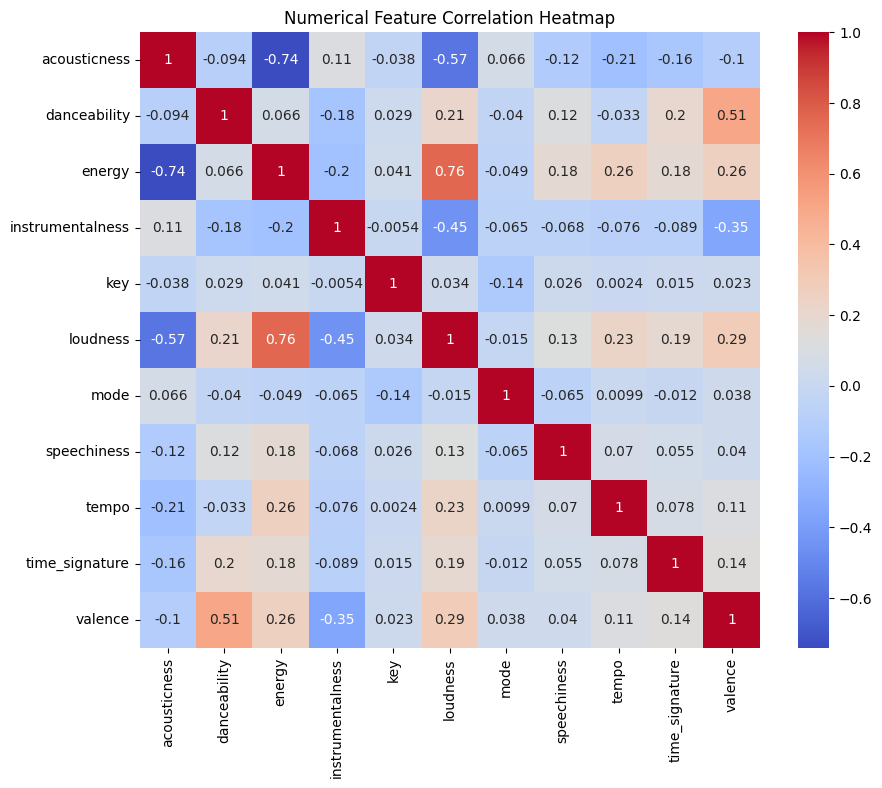

In [7]:
#Creating and visualizing a correlation matrix

non_one_hot_cols = df_encoded.columns.difference(filtered_columns)
correlation_matrix = df_encoded[non_one_hot_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
plt.title('Numerical Feature Correlation Heatmap')
plt.show()

Based on the scatterplot above, we choose to use UMAP for our dimensionality reduction, as it does not assume linearity and can capture global and local patterns.

# Proposed Solution

In motivation to extract the most informative representation of our data or the optimal number of clusterings, we will first reduce the computational complexity on the unsupervised learning algorithms of choice by obtaining a subsample of 40,000 song observations which include 13 musical features such as energy, tempo, valence, danceability, and genre. To further obtain a more feasible and manageable representation of our data, we imported UMAP from the umap library and we applied UMAP as a dimensionality reduction and visualization technique. UMAP is preferred over dimensionality reduction technique PCA as it doesn’t require linearity in our data. In fact, from the numerical feature correlation heatmap, we observed violation of this linearity assumption with no strong correlations between pairs of features (no dark colors closer to 1,-1). Additionally, UMAP is preferred over t-SNE as it has proven to be more efficient at handling more data points than t-SNE due to its stochastic nature. Once we’ve gotten a layout and feel for the data, we will choose the clustering algorithm that best fits our data. Considering the large dataset and complexity of our data, a Gaussian Mixture Model (GMM) from the sklearn.mixture library will most likely be used to cluster the data. GMM is free from assumptions such as spherical clustering, equal variance and equal size of data like with k-means and is less computationally expensive than spectral clustering, especially when working with 40,000 data points. Lastly, an iterative process with the n_components parameter of GMM (ranging from 3-13)  will allow evaluation metrics such as silhouette score from sklearn.metrics library and the elbow method with BIC to produce more comprehensive assessments of the data.


# Evaluation Metrics

In order to evaluate the performance of our Gaussian Mixture Models, we decided to employ two evaluation methods: silhouette score and the Bayesian Information Criterion. Since we want to compare 10 models, each with a different number of clusters, the silhouette score allows us to confirm how well-defined our clusters are. It provides a direct measure of how well each point fits within its assigned cluster compared to other clusters. It’s also simple to interpret, as a higher average score means that the clusters are clearly distinct and that unique groups were successfully identified. BIC, on the other hand, balances fit and complexity by introducing a penalty term for the number of parameters in the model. Although increasing the number of clusters may appear to improve the fit to the data, it might not result in a better model due to overfitting. The quantitative aspect of BIC also makes cross-model comparison simple and straightforward.


# Results

### Dimensionality reduction using UMAP


In [8]:
from umap import UMAP

After several trial runs with different sample sizes (omitted here for brevity's sake) and to compromise on memory allocation and data size tradeoff, we decided to randomly select 40k samples from our data to perform analysis on.

In [9]:
subsample_size = 40000
subsample_40 = df_encoded.sample(n=subsample_size, replace=False, random_state=42)

After several trial runs with different `n_neighbor` values, we select the one that maximizes this parameter while maintaining safe memory allocation.

In [10]:
umap_30_neigh = UMAP(n_neighbors=30,  min_dist=0.1, n_components=2, random_state=99)
ucs = umap_30_neigh.fit_transform(subsample_40)
ucs = pd.DataFrame(ucs,columns=['c1','c2'])

/Users/nickcampos/anaconda3/envs/COGS118B_WI24/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


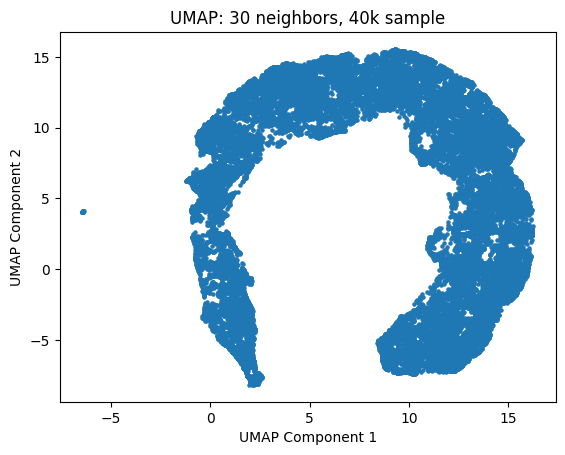

In [11]:
#We visualize the two UMAP components using a scatter plot.
plt.scatter(ucs['c1'], ucs['c2'], s=5)
plt.title('UMAP: 30 neighbors, 40k sample')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.show()

In [12]:
ucs = pd.DataFrame(ucs,columns=['c1','c2'])
ucs.to_csv('./data/ucs.csv', index=False)
df_ucs = pd.read_csv('./data/ucs.csv')

Applying Gaussian Mixture Models with different cluster values and calculating silhouette scores.

In [13]:
#Apply GMM to reduced dimensionality data

#GMM with three clusters: 

gmm_3 = GaussianMixture(n_components=3, random_state=42)
gmm_3.fit(df_ucs)
# Get the predicted cluster labels and probabilities
labels_3 = gmm_3.predict(df_ucs)
probs_3 = gmm_3.predict_proba(df_ucs)

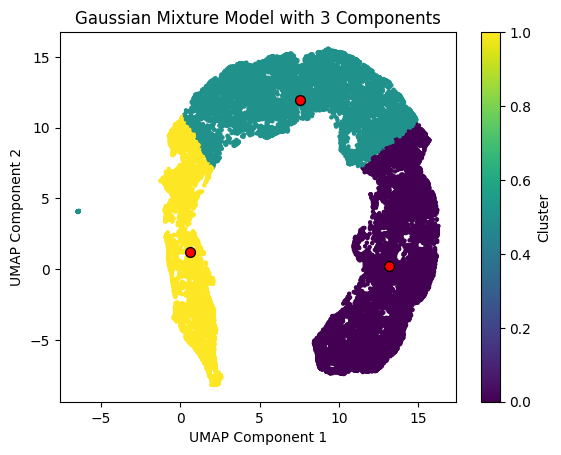

In [14]:
# Plot data points
plt.scatter(df_ucs['c1'], df_ucs['c2'], c=labels_3, cmap='viridis', s=5)

# Plot centroids
centroids = gmm_3.means_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', c='red', s=50, edgecolor='k')

plt.title('Gaussian Mixture Model with 3 Components')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [15]:
#Calculate silhouette score for n_components = 3
silhouette_avg_3 = silhouette_score(df_ucs, labels_3)
print("Silhouette Score (n = 3):", silhouette_avg_3)

Silhouette Score (n = 3): 0.4881778886178652


In [16]:
#GMM with 4 clusters
gmm_4 = GaussianMixture(n_components=4, random_state=42)
gmm_4.fit(df_ucs)
labels_4 = gmm_4.predict(df_ucs)
probs_4 = gmm_4.predict_proba(df_ucs)

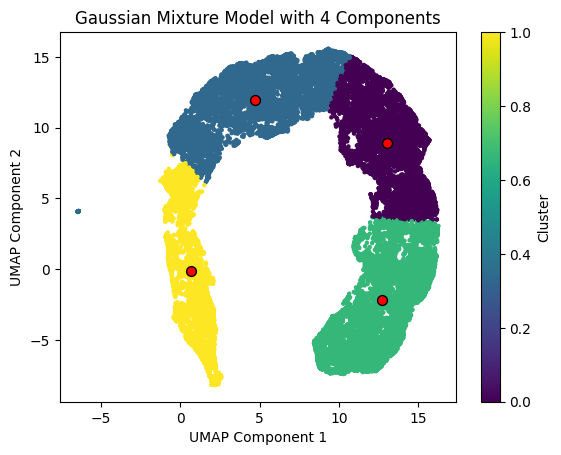

In [17]:
plt.scatter(df_ucs['c1'], df_ucs['c2'], c=labels_4, cmap='viridis', s=5)
centroids = gmm_4.means_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', c='red', s=50, edgecolor='k')

plt.title('Gaussian Mixture Model with 4 Components')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [18]:
#Calculate silhouette score for n_components = 4
silhouette_avg_4 = silhouette_score(df_ucs, labels_4)
print("Silhouette Score (n = 4):", silhouette_avg_4)

Silhouette Score (n = 4): 0.49679292393977137


In [19]:
# GMM with 5 clusters
gmm_5 = GaussianMixture(n_components=5, random_state=42)
gmm_5.fit(df_ucs)

labels_5 = gmm_5.predict(df_ucs)
probs_5 = gmm_5.predict_proba(df_ucs)

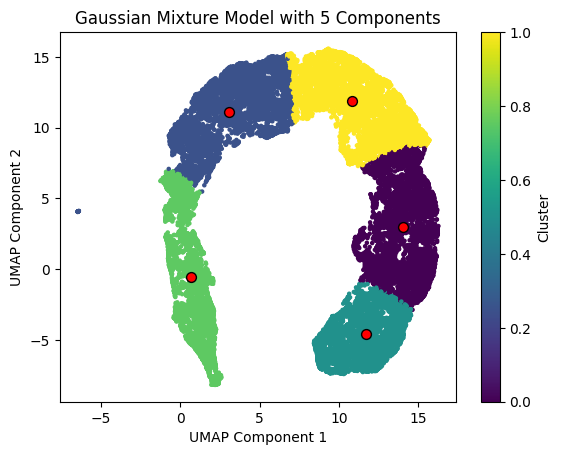

In [20]:
plt.scatter(df_ucs['c1'], df_ucs['c2'], c=labels_5, cmap='viridis', s=5)
centroids = gmm_5.means_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', c='red', s=50, edgecolor='k')

plt.title('Gaussian Mixture Model with 5 Components')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [21]:
#Calculate silhouette score for n_components = 5
silhouette_avg_5 = silhouette_score(df_ucs, labels_5)
print("Silhouette Score (n = 5):", silhouette_avg_5)

Silhouette Score (n = 5): 0.47370112410831317


In [22]:
# GMM with 6 clusters
gmm_6 = GaussianMixture(n_components=6, random_state=42)
gmm_6.fit(df_ucs)
labels_6 = gmm_6.predict(df_ucs)
probs_6 = gmm_6.predict_proba(df_ucs)

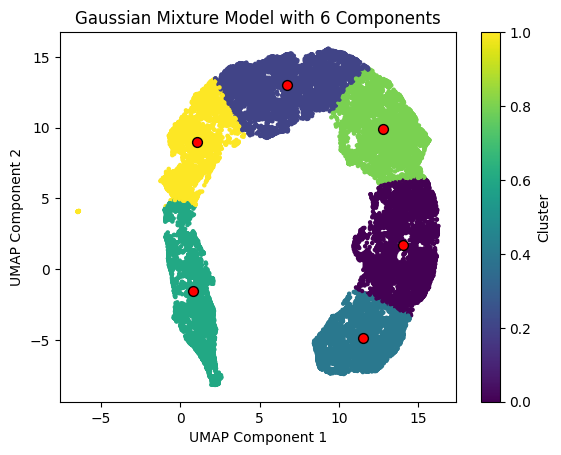

In [23]:
plt.scatter(df_ucs['c1'], df_ucs['c2'], c=labels_6, cmap='viridis', s=5)
centroids = gmm_6.means_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', c='red', s=50, edgecolor='k')
plt.title('Gaussian Mixture Model with 6 Components')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [24]:
#Calculate silhouette score for n_components = 6
silhouette_avg_6 = silhouette_score(df_ucs, labels_6)
print("Silhouette Score (n = 6):", silhouette_avg_6)

Silhouette Score (n = 6): 0.47721200048968404


In [25]:
#GMM with 7 clusters
gmm_7 = GaussianMixture(n_components=7, random_state=42)
gmm_7.fit(df_ucs)
labels_7 = gmm_7.predict(df_ucs)
probs_7 = gmm_7.predict_proba(df_ucs)

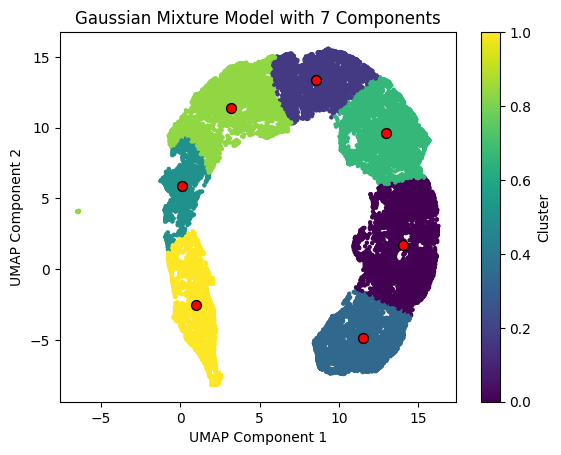

In [26]:
plt.scatter(df_ucs['c1'], df_ucs['c2'], c=labels_7, cmap='viridis', s=5)
centroids = gmm_7.means_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', c='red', s=50, edgecolor='k')

plt.title('Gaussian Mixture Model with 7 Components')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [27]:
#Calculate silhouette score for n_components = 7
silhouette_avg_7 = silhouette_score(df_ucs, labels_7)
print("Silhouette Score (n = 7):", silhouette_avg_7)

Silhouette Score (n = 7): 0.46300737606075215


In [28]:
#GMM with 8 clusters
gmm_8 = GaussianMixture(n_components=8, random_state=42)
gmm_8.fit(df_ucs)
labels_8 = gmm_8.predict(df_ucs)
probs_8 = gmm_8.predict_proba(df_ucs)

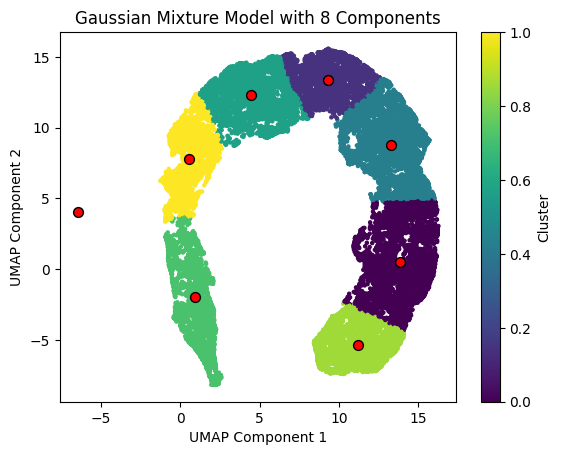

In [29]:
# Plot data points
plt.scatter(df_ucs['c1'], df_ucs['c2'], c=labels_8, cmap='viridis', s=5)

# Plot centroids
centroids = gmm_8.means_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', c='red', s=50, edgecolor='k')

plt.title('Gaussian Mixture Model with 8 Components')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [30]:
#Calculate silhouette score for n_components = 8
silhouette_avg_8 = silhouette_score(df_ucs, labels_8)
print("Silhouette Score (n = 3):", silhouette_avg_8)

Silhouette Score (n = 3): 0.45666439743574566


In [31]:
#GMM with 9 clusters
gmm_9 = GaussianMixture(n_components=9, random_state=42)
gmm_9.fit(df_ucs)
labels_9 = gmm_9.predict(df_ucs)
probs_9 = gmm_9.predict_proba(df_ucs)

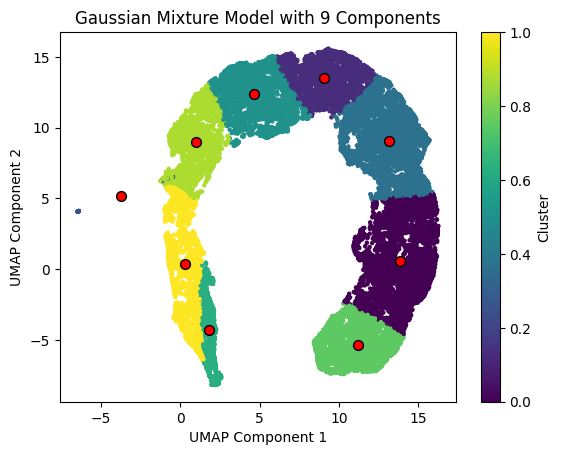

In [32]:
# Plot data points
plt.scatter(df_ucs['c1'], df_ucs['c2'], c=labels_9, cmap='viridis', s=5)

# Plot centroids
centroids = gmm_9.means_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', c='red', s=50, edgecolor='k')

plt.title('Gaussian Mixture Model with 9 Components')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [33]:
#Calculate silhouette score for n_components = 9
silhouette_avg_9 = silhouette_score(df_ucs, labels_9)
print("Silhouette Score (n = 9):", silhouette_avg_9)

Silhouette Score (n = 9): 0.3889869009026313


In [34]:
#GMM with 10 clusters
gmm_10 = GaussianMixture(n_components=10, random_state=42)
gmm_10.fit(df_ucs)
labels_10 = gmm_10.predict(df_ucs)
probs_10 = gmm_10.predict_proba(df_ucs)

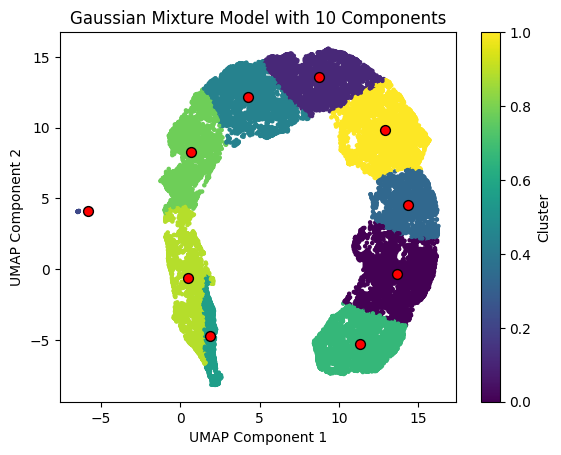

In [35]:
plt.scatter(df_ucs['c1'], df_ucs['c2'], c=labels_10, cmap='viridis', s=5)
centroids = gmm_10.means_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', c='red', s=50, edgecolor='k')

plt.title('Gaussian Mixture Model with 10 Components')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [36]:
#Calculate silhouette score for n_components = 10
silhouette_avg_10 = silhouette_score(df_ucs, labels_10)
print("Silhouette Score (n = 10):", silhouette_avg_10)

Silhouette Score (n = 10): 0.40797365407084274


In [37]:
#GMM with 11 clusters
gmm_11 = GaussianMixture(n_components=11, random_state=42)
gmm_11.fit(df_ucs)
labels_11 = gmm_11.predict(df_ucs)
probs_11 = gmm_11.predict_proba(df_ucs)

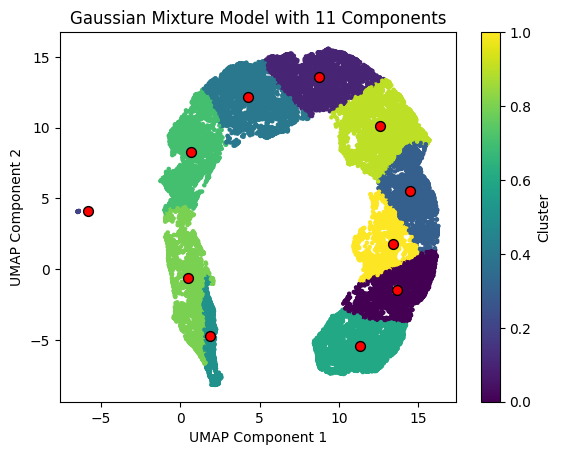

In [38]:
plt.scatter(df_ucs['c1'], df_ucs['c2'], c=labels_11, cmap='viridis', s=5)
centroids = gmm_11.means_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', c='red', s=50, edgecolor='k')

plt.title('Gaussian Mixture Model with 11 Components')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [39]:
#Calculate silhouette score for n_components = 11
silhouette_avg_11 = silhouette_score(df_ucs, labels_11)
print("Silhouette Score (n = 11):", silhouette_avg_11)

Silhouette Score (n = 11): 0.37213948196993235


In [40]:
#GMM with 12 clusters
gmm_12 = GaussianMixture(n_components=12, random_state=42)
gmm_12.fit(df_ucs)
labels_12 = gmm_12.predict(df_ucs)
probs_12 = gmm_12.predict_proba(df_ucs)

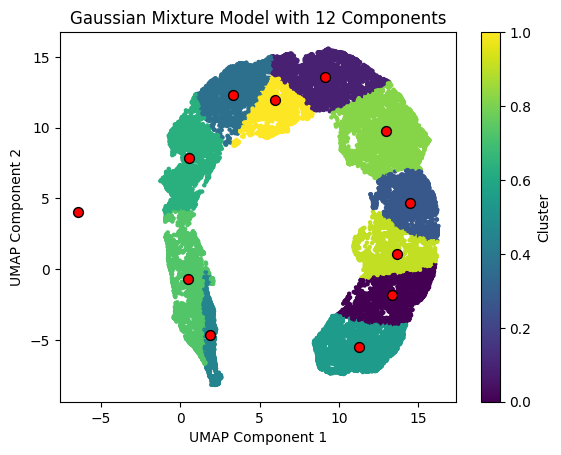

In [41]:
plt.scatter(df_ucs['c1'], df_ucs['c2'], c=labels_12, cmap='viridis', s=5)
centroids = gmm_12.means_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', c='red', s=50, edgecolor='k')

plt.title('Gaussian Mixture Model with 12 Components')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [42]:
#Calculate silhouette score for n_components = 12
silhouette_avg_12 = silhouette_score(df_ucs, labels_12)
print("Silhouette Score (n = 12):", silhouette_avg_12)

Silhouette Score (n = 12): 0.36132500041239485


In [43]:
#GMM with 13 clusters
gmm_13 = GaussianMixture(n_components=13, random_state=42)
gmm_13.fit(df_ucs)
labels_13 = gmm_13.predict(df_ucs)
probs_13 = gmm_13.predict_proba(df_ucs)

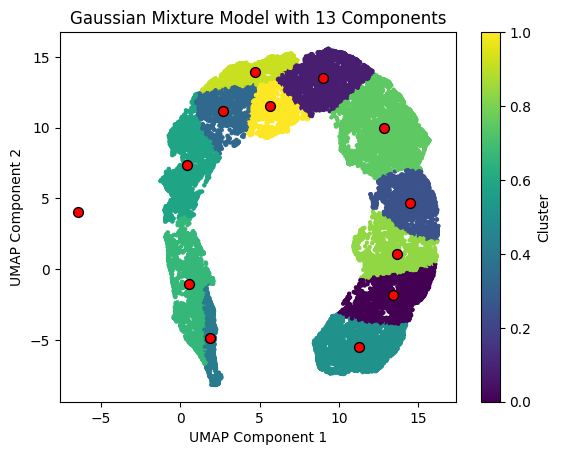

In [44]:
plt.scatter(df_ucs['c1'], df_ucs['c2'], c=labels_13, cmap='viridis', s=5)
centroids = gmm_13.means_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', c='red', s=50, edgecolor='k')

plt.title('Gaussian Mixture Model with 13 Components')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [45]:
#Calculate silhouette score for n_components = 13
silhouette_avg_13 = silhouette_score(df_ucs, labels_13)
print("Silhouette Score (n = 13):", silhouette_avg_13)

Silhouette Score (n = 13): 0.3569802832717495


### Graphing Silhouette Scores

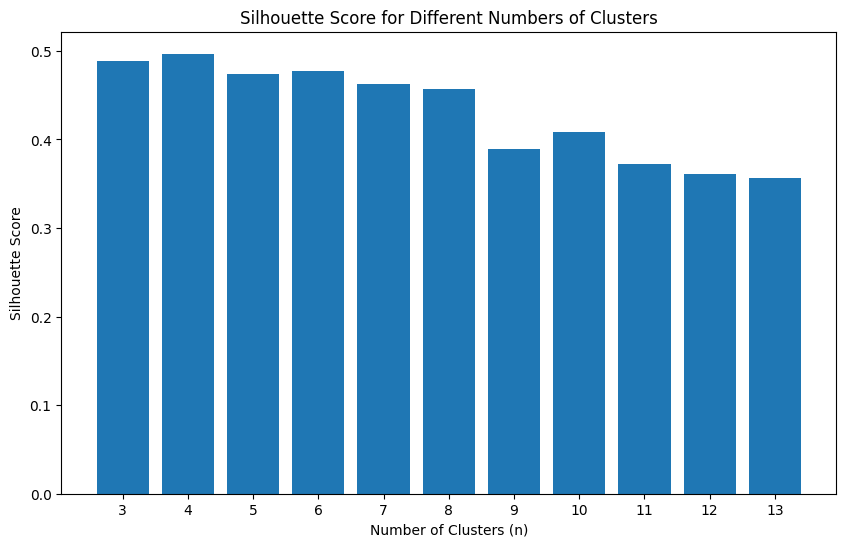

In [46]:
silhouette_scores = {
    3: silhouette_avg_3,
    4: silhouette_avg_4,
    5: silhouette_avg_5,
    6: silhouette_avg_6,
    7: silhouette_avg_7,
    8: silhouette_avg_8,
    9: silhouette_avg_9,
    10: silhouette_avg_10,
    11: silhouette_avg_11,
    12: silhouette_avg_12,
    13: silhouette_avg_13
}

sorted_scores = sorted(silhouette_scores.items(), key=lambda x: x[1], reverse=True)

n_clusters_sorted, scores_sorted = zip(*sorted_scores)

plt.figure(figsize=(10, 6))
plt.bar(n_clusters_sorted, scores_sorted)
plt.xlabel('Number of Clusters (n)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xticks(n_clusters_sorted)
plt.grid(axis='y')
plt.grid(False)

plt.show()

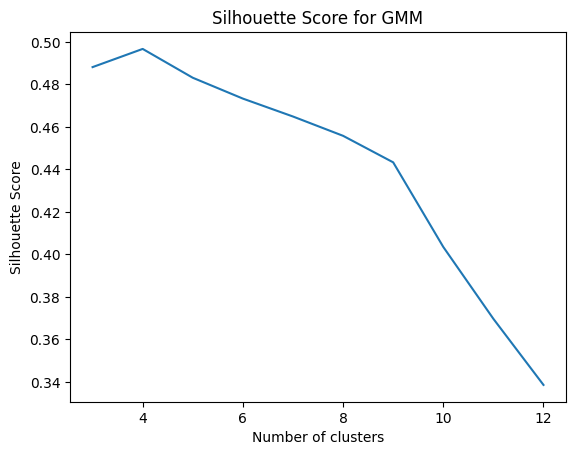

In [47]:
# Visualizing silhouette scores with a line graph now for a better interpretation
n_components_range = range(3, 13)
silhouette_scores = []
for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components)
    labels = gmm.fit_predict(df_ucs)
    silhouette_scores.append(silhouette_score(df_ucs, labels))


plt.plot(n_components_range, silhouette_scores)
plt.title('Silhouette Score for GMM')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

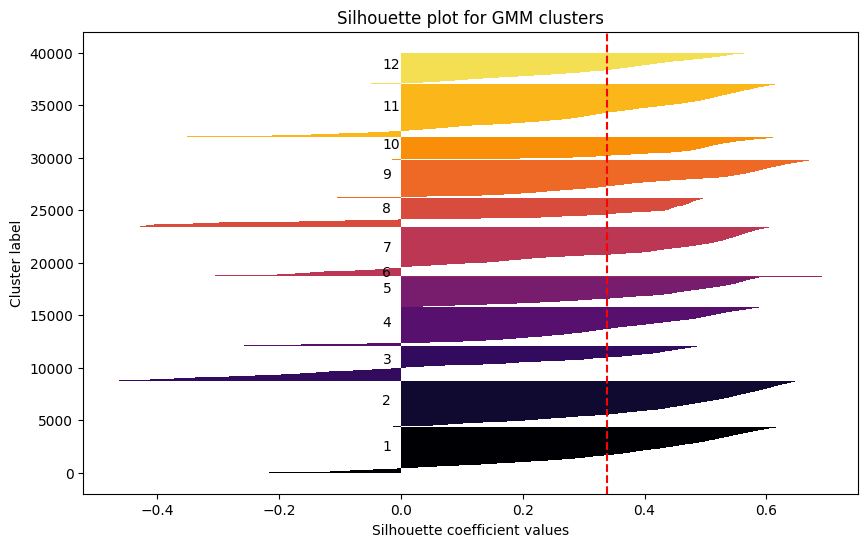

In [48]:
from sklearn.metrics import silhouette_samples

# Calculating silhouette scores for each sample
silhouette_vals = silhouette_samples(df_ucs, labels)

# Sorting the silhouette values
sorted_silhouette_vals = sorted(silhouette_vals)

# Getting the number of clusters
n_clusters = len(np.unique(labels))

# Creating the silhouette plot
plt.figure(figsize=(10, 6))
y_lower, y_upper = 0, 0
for i in range(n_clusters):
    # Aggregating the silhouette scores for samples belonging to cluster i
    ith_cluster_silhouette_vals = silhouette_vals[labels == i]
    ith_cluster_silhouette_vals.sort()

    # Computing y_lower and y_upper for plotting
    y_upper += len(ith_cluster_silhouette_vals)
    color = plt.cm.inferno(float(i) / n_clusters)
    plt.barh(range(y_lower, y_upper), ith_cluster_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    # Labeling the silhouette plots with their cluster numbers
    plt.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))

    # Computing the new y_lower for the next plot
    y_lower += len(ith_cluster_silhouette_vals)

# labeling x and y axis
plt.xlabel('Silhouette coefficient values')
plt.ylabel('Cluster label')

# The vertical line for average silhouette score of all the values
plt.axvline(x=np.mean(silhouette_vals), color='red', linestyle='--')

# The silhouette score gives us a perspective into the density and similarity within clusters
plt.title('Silhouette plot for GMM clusters')

plt.show()

### Elbow Method

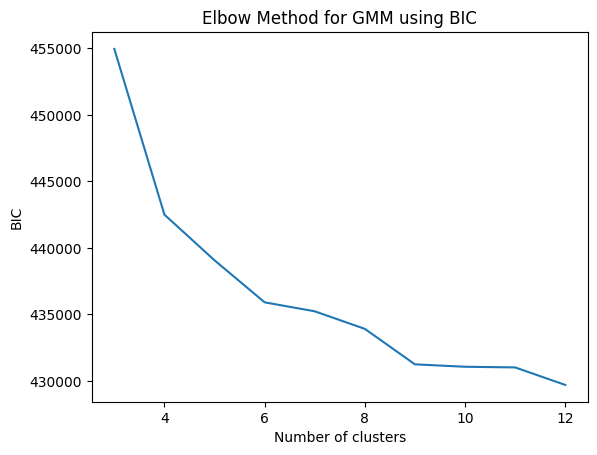

In [49]:
from sklearn import datasets

# BIC as a secondary evaluation metric for different number of clusters
n_components_range = range(3, 13)
bic = []
for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components)
    gmm.fit(df_ucs)
    bic.append(gmm.bic(df_ucs))

# Plotting the elbow method graph using BIC
plt.plot(n_components_range, bic)
plt.title('Elbow Method for GMM using BIC')
plt.xlabel('Number of clusters')
plt.ylabel('BIC')
plt.show()

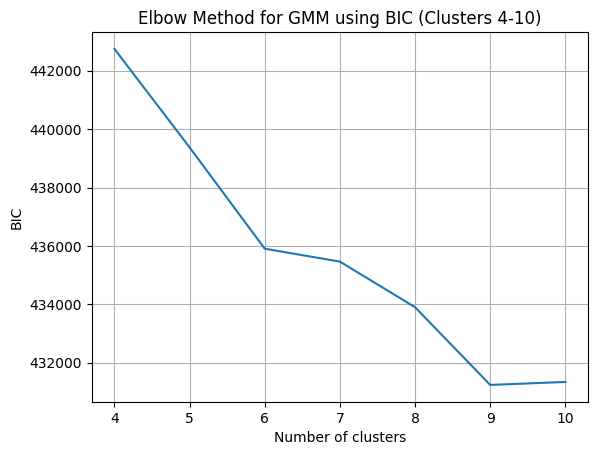

In [50]:
# Zooming in on optimal number of clusters range
n_components_range = range(4, 11)  # Adjusted range for clusters 4 to 7
bic = []
for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components)
    gmm.fit(df_ucs)
    bic.append(gmm.bic(df_ucs))

# Plotting the elbow method graph using BIC for clusters 4 to 10
plt.plot(n_components_range, bic)
plt.title('Elbow Method for GMM using BIC (Clusters 4-10)')
plt.xlabel('Number of clusters')
plt.ylabel('BIC')
plt.xticks(n_components_range)  # Set x-axis ticks to match cluster numbers
plt.grid(True)
plt.show()

# Discussion

### Interpreting the result

The silhouette score is a measure of how similar an object is to its own cluster compared to other clusters. A higher silhouette score indicates that objects are well matched to their own cluster and poorly matched to neighboring clusters. From the bar graph, it looks like the score peaks at around 5 clusters and then generally declines, although it's not a strictly monotonic decrease. The silhouette score line graph indicates that the highest score is achieved with 5 clusters and it decreases as the number of clusters increases. The silhouette plot for GMM clusters visually confirms the quality of clustering. It is ideal for the majority of the points to have a high silhouette coefficient, as close to +1 as possible. The width of the silhouette plots (cluster sizes) is not very consistent, suggesting variability in cluster densities.

The Bayesian Information Criterion (BIC) is a criterion for model selection among a finite set of models. The model with the lowest BIC is preferred. The first graph shows the BIC values for the number of clusters. It indicates a sharp turn or "elbow" around 4-6 clusters. After this point, the decrease in BIC becomes more gradual. To confidently pinpoint which number of clusters is most optimal to choose, we decided to zoom in on the number of clusters ranging from 4 to 10. It is more clear in this visualization that 6 clusters is optimal. 

Based on the silhouette scores, 5 clusters may seem optimal as it achieves the highest score. However, the elbow method with BIC suggests that 6 clusters might be a better choice since the BIC value starts to level off after this point, indicating diminishing returns for adding more clusters.

### Limitations

While we tried a variety of methods to understand any patterns within our Spotify data, there are always limitations and potential areas for improvement. One of the first limitations comes at the initial step of preprocessing. In order to decrease our dimensionality and allow for more computational efficiency, we removed and adjusted several features. For instance, in the context of this problem, we decided to remove explicitness, duration, popularity, and liveness variables. We also removed any observations where no key was detected or where a track was predicted to be exclusively speech. While we initially considered these to be non-critical attributes, these could very well include important information that would impact clustering and ultimately impact the success of a music recommendation system. More data could also be helpful in determining how well our clustering approaches scale to unseen tracks and might reveal unseen patterns in the data.

There is also always a risk of losing information when any dimensionality reduction technique is performed, including UMAP. The sensitivity of UMAP’s parameters greatly influences the outcome, but parameter fine-tuning can take a lot of time and computational resources. More exploration in this area could reveal patterns that were otherwise undiscovered. As for GMM, all of the data points are assumed to have been generated from a limited mixture of Gaussian distributions with unknown parameters. This might not always be the case with song tracks, especially when looking at a certain level of complexity. With regards to our evaluation metrics, although the silhouette score provides a good measure of intra and inter cluster similarity, it might not capture all aspects of their relationships. The effectiveness is also dependent on the distance metric, which we attempted to align with the data’s geometry.

### Ethics & Privacy

Sampling Bias - Although this is a randomized spotify music dataset, we cannot ensure the dataset accurately captures all the wide range of music on spotify or the numerous genres there exist in music. Moreover, we acknowledge that building a recommendation system based on spotify tracks may not accurately predict user’s next preferred choice of music on other music streaming platforms or in general outside of the scope of the songs available in the dataset.

Anonymity - We have controlled for the privacy concern of anonymity with song tracks that are tied to no identifiable data of the user and solely represent the physical properties and measurable features of music. There is no information of name, age, gender, location or any other revealing information.

Licensing - There are no conflicts of licensing with artist or music labels as the dataset obtained are spotify track songs which become only publicly available once an agreement has been established between the artist and Spotify. We have no knowledge nor are involved in this agreement between the artist and Spotify. Our research is based on a public dataset on Kaggle.

Affiliations - We are not receiving any funds nor is our research being sponsored by Spotfiy. We establish no affiliation with Spotify and our research is not considering, and will not consider, any suggestions or recommendations from Spotify if communication were to be established. Our research is not intended to benefit a particular party and is solely focused on the investigative process of potential music recommendations predictions.

### Conclusion

After carrying out UMAP and plotting 10 trials of GMMs ranging from 3 components to 13, we evaluated the performances of our models by cross-referencing both the silhouette scores and the BIC scores for each iteration. After plotting the average silhouette scores, the GMM model that makes use of 5 clusters appears to perform the best as it doesn’t have many data points with negative silhouette scores and maintains a uniform shape. In the context of BIC scores, we used the elbow method to find the point where increasing the number of clusters would result in diminishing returns. At 6 clusters, the decrease in BIC becomes less steep, suggesting that adding more clusters would not improve the model’s performance compared to the penalty for increasing the complexity. In the context of this project’s domain of music recommendation, neither option is much greater or worse than the other. Since music taste and the boundaries between musical styles/genres are complex and subjective, there isn’t an urgent need to have our clusters define extremely clear-cut classifications.

A further step into our analysis could include the use of spectral clustering. We attempted to make a model with a randomized sample of 20,000 songs but it was too computationally expensive to reliably run and decreasing the sample size further wouldn’t be ideal. There are several other directions that this project could be built into for the future. As it stands, this project is not meant to function as an immediate music recommendation system. Our goal was to explore the relationships between complex tracks and discover underlying patterns in a large dataset. A recommendation system based on this work could take advantage of these clusters in finding similarities between songs as songs that are clustered together could feasibly be used as recommendations to one another. Combined with a supervised machine learning model, new songs could be integrated into the corpus and build an even larger map of song connections.


# Footnotes

1. <a name="cite_note-1"></a> [^](#cite_ref-1) Anonymous User. (16 Feb 2018) Bad Music Recommendations **Apple Support Community.** https://discussions.apple.com/thread/8284099?sortBy=best 
2. <a name="cite_note-2"></a> [^](#cite_ref-2) The Data School. (2 Apr 2023) Machine Learning 101 and The Spotify Case **The Data School.** https://www.thedataschool.com.au/mipadmin/machine-learning-101-and-the-spotify-case/#:~:text=Supervised%20Learning%20%E2%80%93%20Music%20Recommendations%3A%20Spotify's,you're%20likely%20to%20enjoy._ 
3. <a name="cite_note-3"></a> [^](#cite_ref-3) Roy, D., Dutta, M. (3 May 2022) A systematic review and research perspective on recommender systems **Journal of Big Data 9, 59.** https://doi.org/10.1186/s40537-022-00592-5